# DSA Assignment 6: Model Selection
- Aravind A

## Importing the dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data['Age'].median()

28.0

In [7]:
data['Age'].mode()

0    24.0
Name: Age, dtype: float64

## Data Preprocessing

- Cabin column can be dropped since it has large number of missing values and doesn't provide much information for model building.

In [8]:
data.drop(['Cabin'], axis=1, inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


- Setting Passenger Id column as index column

In [10]:
data = data.set_index('PassengerId')

In [11]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Filling missing values in columns

- Age column

In [12]:
import matplotlib.pyplot as plt

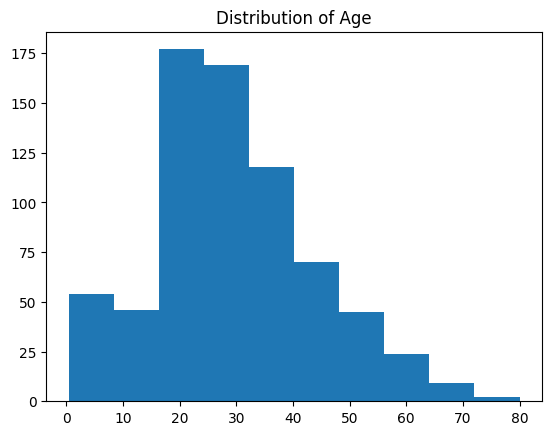

In [13]:
plt.hist(data['Age'])
plt.title("Distribution of Age")
plt.show()

- fill age column with median value

In [14]:
data['Age'] = data["Age"].fillna(data['Age'].median())

In [15]:
data['Age'].isna().sum()

0

 - Embarked column


In [16]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
data['Embarked'].isna().sum()

2

In [18]:
import seaborn as sns

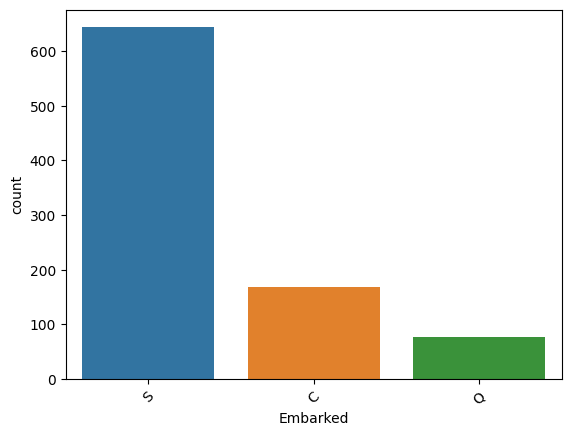

In [19]:
sns.countplot(x='Embarked', data=data)
plt.xticks(rotation=45)
plt.show()

In [20]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

- fill Embarked missing values with mode of Embarked column

In [21]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [22]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Handling Outliers

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


In [24]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


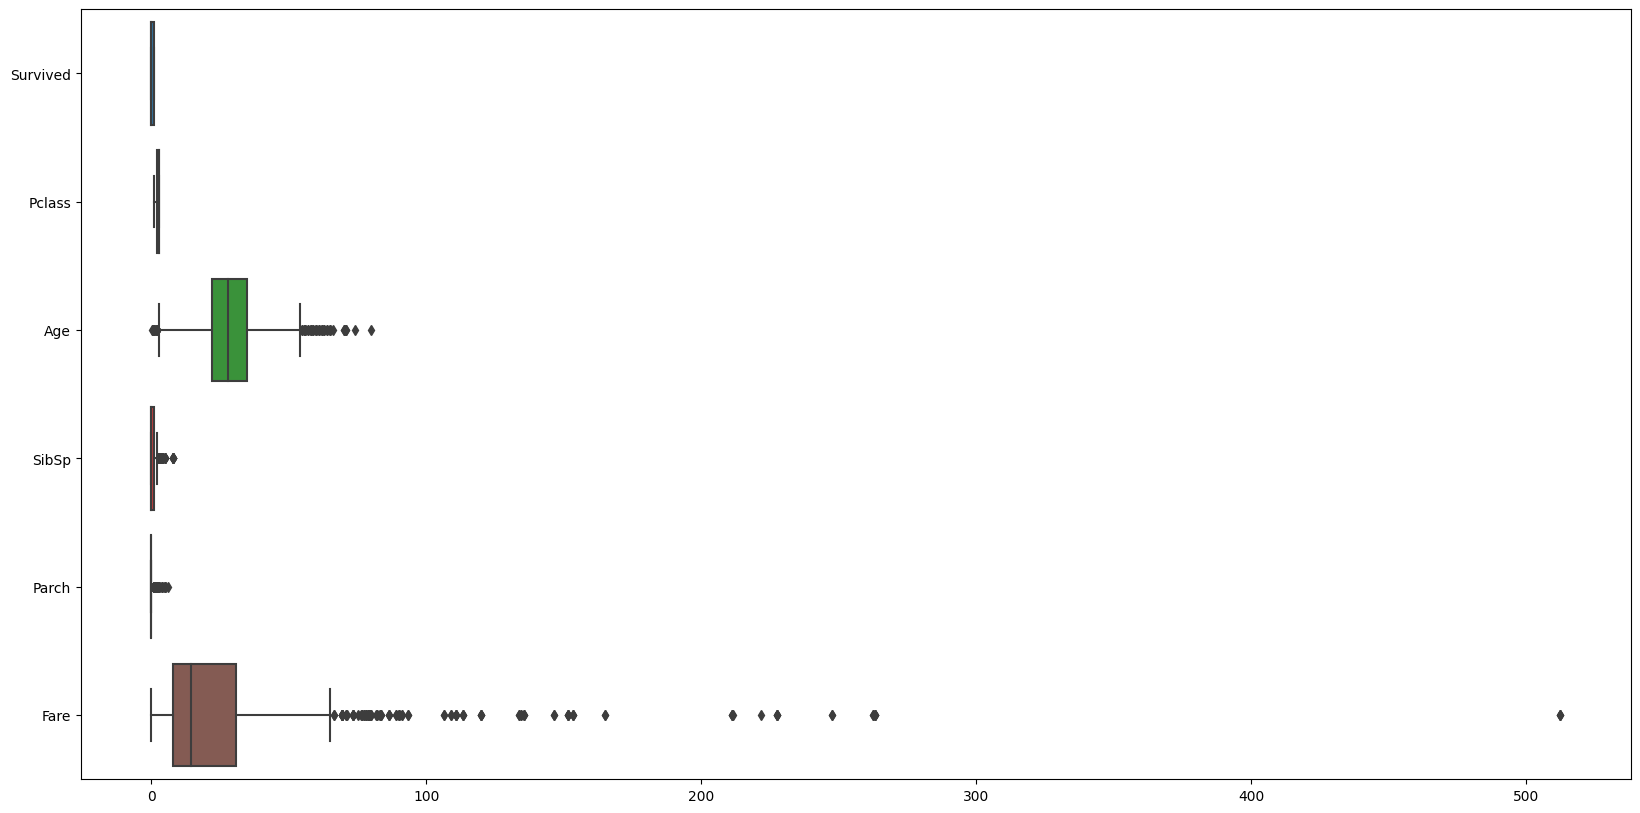

In [25]:
# Boxplot to detect outlier presence
plt.figure(figsize=(20,10))
sns.boxplot(data=data, orient='h')
plt.show()

### Age column

In [26]:
import numpy as np

In [27]:
#using IQR method to identify those outliers

Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q2=np.percentile(data['Age'],50,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
Q1, Q2, Q3

C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2654780432.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Age'],25,interpolation='midpoint')
C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2654780432.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Age'],50,interpolation='midpoint')
C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2654780432.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'm

(22.0, 28.0, 35.0)

In [28]:
IQR= Q3 - Q1
low_limit = Q1 - 1.5* IQR
up_limit = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",low_limit)
print("Upper limit is: ",up_limit)

IQR is :  13.0
Lower Limit is : 2.5
Upper limit is:  54.5


In [29]:
#Finding those outlier values

outlier_age = []
for i in data['Age']:
    if((i>up_limit) or (i<low_limit)):
        outlier_age.append(i)

In [30]:
outlier_age

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [31]:
len(outlier_age)

66

- dropping outlier values can affect the model quality

 ### Fare column

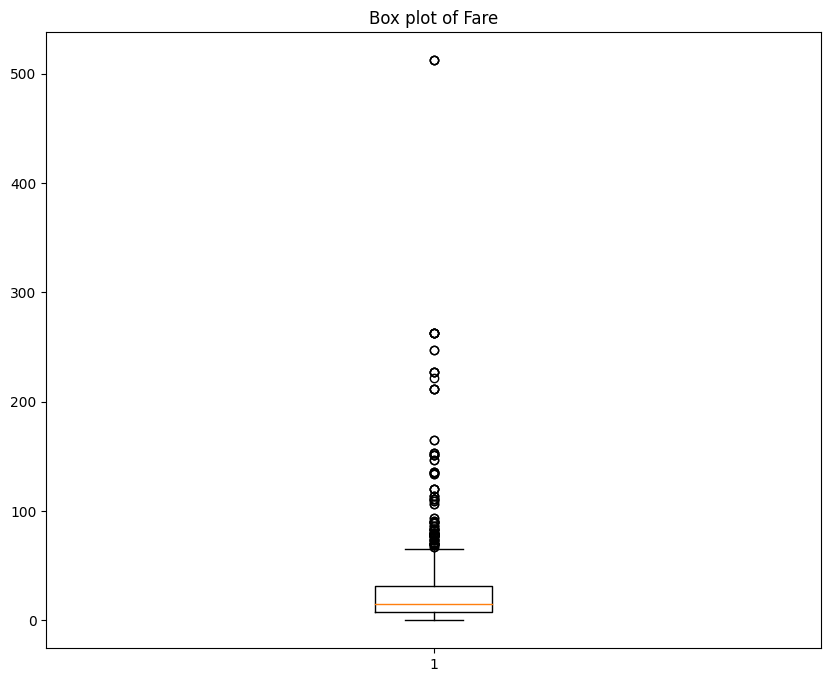

In [32]:
plt.figure(figsize=(10,8))
plt.boxplot(data['Fare'])
plt.title('Box plot of Fare')
plt.show()

In [33]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')
Q1, Q2, Q3

C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2322165372.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2322165372.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2322165372.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 

(7.9104, 14.4542, 31.0)

In [34]:
IQR_fare=Q3-Q1
IQR_fare

23.0896

In [36]:
lower_fare=Q1-1.5*IQR_fare
upper_fare=Q3+1.5*IQR_fare
print('lower and upper limit for Fare')
print(lower_fare)
print(upper_fare)

lower and upper limit for Fare
-26.724
65.6344


In [37]:
#Finding outlier values in Fare

outliers_fare=[]
for i in data['Fare']:
    if(i>upper_fare)or(i<lower_fare):
        outliers_fare.append(i)
len(outliers_fare)

116

In [38]:
# index of outlier values
ind_fare_outlier=data['Fare']>upper_fare
ind_fare_outlier

PassengerId
1      False
2       True
3      False
4      False
5      False
       ...  
887    False
888    False
889    False
890    False
891    False
Name: Fare, Length: 891, dtype: bool

`data.drop(data.loc[ind1].index,inplace=True)`

C:\Users\admax\AppData\Local\Temp\ipykernel_6964\2424372471.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()


<AxesSubplot: >

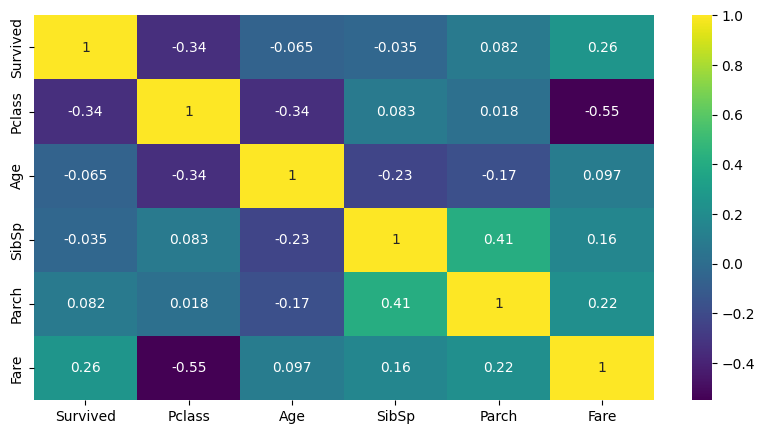

In [39]:
#Heatmap to find correlation
cor=data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='viridis')

- Taking Survived as the target column


In [40]:
#correlation of features with target variable(Survived)
data.corr()["Survived"]

C:\Users\admax\AppData\Local\Temp\ipykernel_6964\1301544126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["Survived"]


Survived    1.000000
Pclass     -0.338481
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

## features

In [41]:
#Combine SibSp and Parch as family count
data['Family_count']=data['SibSp']+data['Parch']
data.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_count
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1


In [43]:
data[['Family_count', 'Survived']].groupby(['Family_count'], as_index=False).mean()

,Family_count,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


- more family members less chance of survival

## Dropping unncessary features from data

In [44]:
#dropping the columns Name and  Ticket as it doesnot contribute to the model
data.drop(['Name', 'Ticket'],axis=1,inplace=True)

#Dropping SibSp and Parch columns as we formed a new columns Family_cnt out of it
data.drop(['SibSp','Parch',],axis=1,inplace=True)
data.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count
PassengerId,,,,,,,
1,0,3,male,22.0,7.2500,S,1
2,1,1,female,38.0,71.2833,C,1


## Encoding

In [45]:
data['Sex'].nunique(), data['Embarked'].nunique()

(2, 3)

In [46]:
#Label encoding sex and embarked columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count
PassengerId,,,,,,,
1,0,3,1,22.0,7.2500,2,1
2,1,1,0,38.0,71.2833,0,1
3,1,3,0,26.0,7.9250,2,0
4,1,1,0,35.0,53.1000,2,1
5,0,3,1,35.0,8.0500,2,0


## Sacling

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [49]:
#taking only numerical columns that are not encoded
numerical_cols=['Pclass', 'Age', 'Family_count','Fare']
data[numerical_cols]=scaler.fit_transform(data[numerical_cols])

In [50]:
data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_count
count,891.000000,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,0.383838,-8.772133e-17,0.647587,2.272780e-16,3.987333e-18,1.536476,-3.987333e-18
std,0.486592,1.000562e+00,0.477990,1.000562e+00,1.000562e+00,0.791503,1.000562e+00
min,0.000000,-1.566107e+00,0.000000,-2.224156e+00,-6.484217e-01,0.000000,-5.609748e-01
25%,0.000000,-3.693648e-01,0.000000,-5.657365e-01,-4.891482e-01,1.000000,-5.609748e-01
50%,0.000000,8.273772e-01,1.000000,-1.046374e-01,-3.573909e-01,2.000000,-5.609748e-01
75%,1.000000,8.273772e-01,1.000000,4.333115e-01,-2.424635e-02,2.000000,5.915988e-02
max,1.000000,8.273772e-01,1.000000,3.891554e+00,9.667167e+00,2.000000,5.640372e+00


# Create kNN and SVM models

In [51]:
# x and y
X=data.drop('Survived',axis=1)
y=data['Survived']

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=142)

- kNN Classifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [55]:
#Finding the best K value for kNN 

metric_k=[]  
neighbors=range(3,18,2)  

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,pred_kNN) 
    metric_k.append(acc)

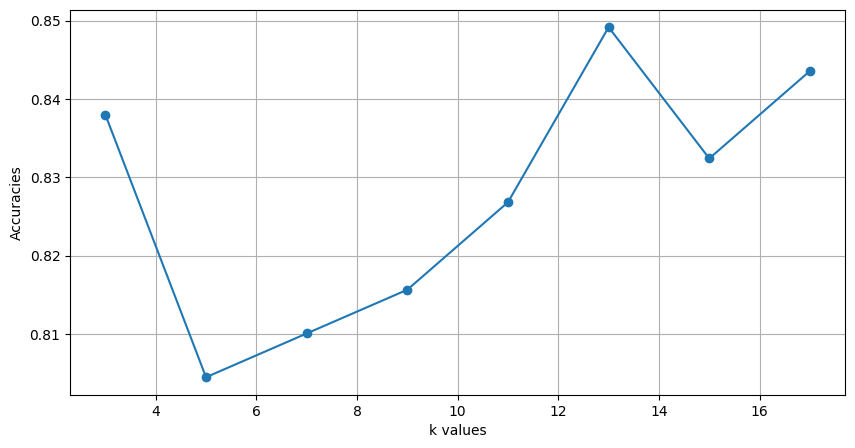

In [56]:
# plot it to find the  k value that gives better accuracy 

plt.figure(figsize=(10,5))
plt.plot(neighbors,metric_k,'o-')  
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid() 

In [57]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [58]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       116
           1       0.73      0.73      0.73        63

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



In [59]:
#Confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_knn)
cnf_matrix

array([[99, 17],
       [17, 46]], dtype=int64)

In [60]:
print('The accuracy of KNN is',accuracy_score(y_test,y_pred_knn))

The accuracy of KNN is 0.8100558659217877


- SVM model

In [61]:
from sklearn import svm 
from sklearn.svm import SVC

In [62]:
# SVM using kernel as Linear
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
y_pred_svm1=svm_linear.predict(X_test)

In [63]:
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       116
           1       0.74      0.68      0.71        63

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [64]:
print('The accuracy of Support vector machine using linear kernal is',accuracy_score(y_test,y_pred_svm1))

The accuracy of Support vector machine using linear kernal is 0.8044692737430168


## k-fold and stratified k-fold cross validation techniques

### K-Fold Cross validataion

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
kfold_val=KFold(10)

In [69]:
#For KNN model
cv_result_knn=cross_val_score(knn,X,y,cv=kfold_val)
cv_result_knn

array([0.77777778, 0.82022472, 0.76404494, 0.76404494, 0.83146067,
       0.79775281, 0.85393258, 0.74157303, 0.84269663, 0.76404494])

- average cross validation score for KNN model

In [71]:
kfold_knn=np.mean(cv_result_knn)
np.mean(cv_result_knn)

0.7957553058676654

- SVM Model

In [73]:
cv_result_svm1=cross_val_score(svm_linear,X,y,cv=kfold_val)
print(cv_result_svm1)
kfold_svm1=np.mean(cv_result_svm1)
print('average cv score for SVM model:',np.mean(cv_result_svm1))

[0.81111111 0.82022472 0.75280899 0.84269663 0.76404494 0.79775281
 0.74157303 0.73033708 0.84269663 0.76404494]
average cv score for SVM model: 0.786729088639201


### Stratified K-Fold Cross Validation

In [74]:
from sklearn.model_selection import StratifiedKFold
skfold_val=StratifiedKFold(n_splits=10)

- KNN model validation

In [76]:
skcv_result_knn=cross_val_score(knn,X,y,cv=skfold_val)
print(skcv_result_knn)

print('The stratified K-Fold score for KNN is ',np.mean(skcv_result_knn))

[0.78888889 0.82022472 0.74157303 0.78651685 0.85393258 0.79775281
 0.87640449 0.75280899 0.80898876 0.7752809 ]
The stratified K-Fold score for KNN is  0.8002372034956305


- SVM model

In [77]:
skfold_val_svm=StratifiedKFold(n_splits=10)

In [78]:
skcv_result_svm1=cross_val_score(svm_linear,X,y,cv=skfold_val_svm)
print(skcv_result_svm1)

[0.81111111 0.79775281 0.76404494 0.84269663 0.79775281 0.7752809
 0.76404494 0.74157303 0.80898876 0.76404494]


In [79]:

print('The stratified K-Fold score for Linear SVM is ',np.mean(skcv_result_svm1))

The stratified K-Fold score for Linear SVM is  0.786729088639201
